In [1]:
# Notebook containing different forcasting models

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import TimeSeriesSplit
from datetime import date

# Importing functions from src/data
parent_dir = os.path.abspath(os.path.join('..'))
module_path = parent_dir + "/src/data"

if module_path not in sys.path:
    sys.path.append(module_path)
    
from helpers import create_item_dataframe

In [3]:
df = create_item_dataframe("Silicon", "0")

Command executed successfully
Command executed successfully


In [4]:
df = df[df.time > '2022-05-31']
df

,time,buy_weightedAverage,buy_max,buy_min,buy_stddev,buy_median,buy_volume,buy_orderCount,buy_percentile,sell_weightedAverage,sell_max,sell_min,sell_stddev,sell_median,sell_volume,sell_orderCount,sell_percentile
0,2022-05-31 20:00:39.045802,326.975600,600.0,0.01,170.722074,400.00,19685167.0,77,564.817238,641.592850,1894.0,266.1,179.811435,598.55,9885154.0,82,353.266682
134,2022-05-31 00:00:40.991810,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.801850,1894.0,266.1,178.091270,598.55,9846098.0,82,353.128907
135,2022-05-31 01:00:40.873256,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.801850,1894.0,266.1,178.091270,598.55,9846098.0,82,353.128907
136,2022-05-31 02:00:38.231644,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.855785,1894.0,266.1,179.125326,598.70,9838143.0,81,353.100711
137,2022-05-31 03:00:41.165245,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.857475,1894.0,266.1,179.100366,598.70,9839743.0,81,353.106385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2022-06-13 17:00:39.701133,316.067964,600.0,0.01,182.937670,404.10,18920786.0,63,575.072959,648.628746,1894.0,266.1,195.108706,654.55,8790521.0,64,380.161836
463,2022-06-13 18:00:40.145131,314.692640,600.0,0.01,184.596012,400.65,18781905.0,60,575.109731,648.625333,1894.0,266.1,195.107657,654.45,8790521.0,64,380.161836
464,2022-06-13 19:00:38.989791,322.719378,600.0,0.01,185.122152,400.10,19599353.0,59,574.570469,648.946597,1894.0,266.1,197.031470,654.75,8771723.0,62,380.119322
465,2022-06-13 20:00:38.129307,322.193595,600.0,0.01,185.122784,400.10,19557819.0,59,574.033604,648.937807,1894.0,266.1,197.032555,654.75,8753623.0,62,380.078214


In [5]:
df['time_int'] = [i for i in range(df.shape[0])]
df

,time,buy_weightedAverage,buy_max,buy_min,buy_stddev,buy_median,buy_volume,buy_orderCount,buy_percentile,sell_weightedAverage,sell_max,sell_min,sell_stddev,sell_median,sell_volume,sell_orderCount,sell_percentile,time_int
0,2022-05-31 20:00:39.045802,326.975600,600.0,0.01,170.722074,400.00,19685167.0,77,564.817238,641.592850,1894.0,266.1,179.811435,598.55,9885154.0,82,353.266682,0
134,2022-05-31 00:00:40.991810,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.801850,1894.0,266.1,178.091270,598.55,9846098.0,82,353.128907,1
135,2022-05-31 01:00:40.873256,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.801850,1894.0,266.1,178.091270,598.55,9846098.0,82,353.128907,2
136,2022-05-31 02:00:38.231644,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.855785,1894.0,266.1,179.125326,598.70,9838143.0,81,353.100711,3
137,2022-05-31 03:00:41.165245,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.857475,1894.0,266.1,179.100366,598.70,9839743.0,81,353.106385,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2022-06-13 17:00:39.701133,316.067964,600.0,0.01,182.937670,404.10,18920786.0,63,575.072959,648.628746,1894.0,266.1,195.108706,654.55,8790521.0,64,380.161836,329
463,2022-06-13 18:00:40.145131,314.692640,600.0,0.01,184.596012,400.65,18781905.0,60,575.109731,648.625333,1894.0,266.1,195.107657,654.45,8790521.0,64,380.161836,330
464,2022-06-13 19:00:38.989791,322.719378,600.0,0.01,185.122152,400.10,19599353.0,59,574.570469,648.946597,1894.0,266.1,197.031470,654.75,8771723.0,62,380.119322,331
465,2022-06-13 20:00:38.129307,322.193595,600.0,0.01,185.122784,400.10,19557819.0,59,574.033604,648.937807,1894.0,266.1,197.032555,654.75,8753623.0,62,380.078214,332


## Cross Validation

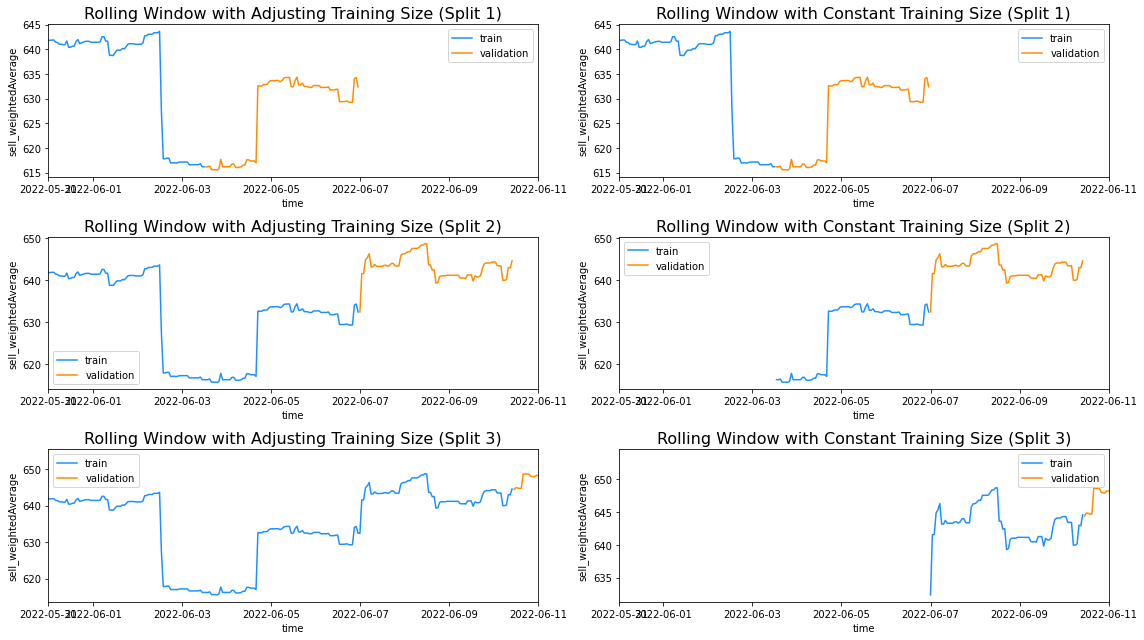

In [6]:

# Targeting the sell_weightedAverage feature for cross validation training
X = df.time
y = df.sell_weightedAverage

SPLITS = 3
folds = TimeSeriesSplit(n_splits=SPLITS)

f, ax = plt.subplots(nrows=SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(SPLITS):
    ax[i, 0].set_xlim([date(2022, 5, 31), date(2022, 6, 11)])
    ax[i, 1].set_xlim([date(2022, 5, 31), date(2022, 6, 11)])

plt.tight_layout()
plt.show()

# Modeling

## 1. Naive Approach

In [7]:
# Counting the days in June
df = df[(df['time'] > '2022-06-01') & (df['time'] < '2022-06-30')]
df['day'] = pd.DatetimeIndex(df['time']).day


/tmp/ipykernel_2806281/2108585036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = pd.DatetimeIndex(df['time']).day


In [8]:
df['day_idx'] = (df.day != df.day.shift(1)).cumsum()

target = 'sell_weightedAverage'
features = [feature for feature in df.columns if feature != target]

N_SPLITS = 12

X = df[df.day_idx < N_SPLITS][features]
y = df[df.day_idx < N_SPLITS][target]

X_test = df[df.day_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.day_idx == N_SPLITS][target].reset_index(drop=True)

/tmp/ipykernel_2806281/4165365314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_idx'] = (df.day != df.day.shift(1)).cumsum()


In [9]:
df.day.cumsum()

157       1
158       2
159       3
160       4
161       5
       ... 
462    2106
463    2119
464    2132
465    2145
466    2158
Name: day, Length: 310, dtype: int64

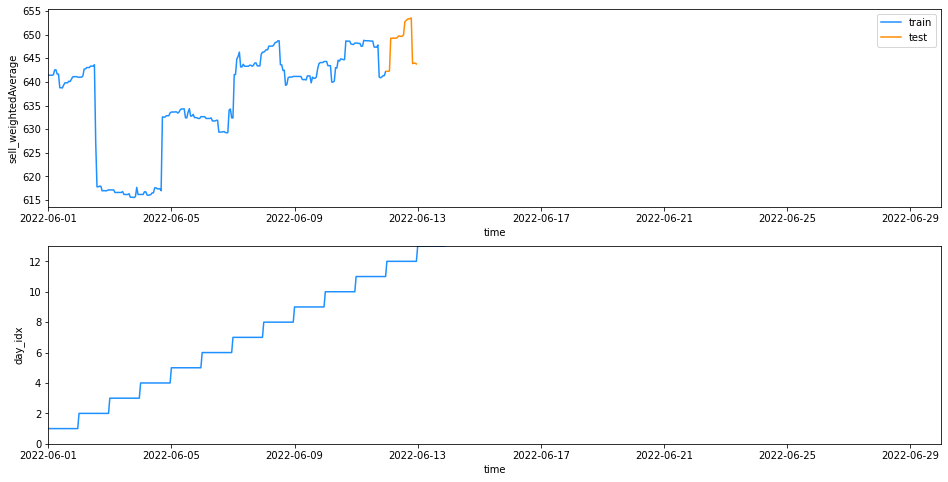

In [10]:
folds = np.linspace(0, N_SPLITS-3, num=N_SPLITS-2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=X.time, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.time, y=y_test, ax=ax[0], color='darkorange', label='test')

sns.lineplot(x=df.time, y=df.day_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2022, 6, 1), date(2022, 6, 30)])
ax[1].set_xlim([date(2022, 6, 1), date(2022, 6, 30)])
ax[1].set_ylim([0, N_SPLITS+1])
#ax[0].set_ylim([-28, -23])

plt.show()

In [11]:
def mean_squared_error(A, B):
    return ((A - B)**2).mean()

def mean_absolute_error(A, B):
    return np.absolute((A - B)).mean()

def plot_approach_evaluation(y_pred, y_valid_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X.time, y=y, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test.time, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test.time, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([date(2018, 6, 30), date(2020, 6, 30)])
    ax[0].set_ylim([-27, -23])
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_valid, y_valid_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Depth to Groundwater P25', fontsize=14)

    sns.lineplot(x=folds, y=score_mae,  color='gold', label='MAE', ax=ax[1])#marker='o',
    sns.lineplot(x=folds, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    ax[1].set_ylim([0, 4])   
    plt.show()

In [12]:
score_mae = []
score_rsme = []
for fold, day_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    print((fold, day_id))
    train_index = df[df.day_idx < day_id].index
    valid_index = df[df.day_idx == day_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach
    y_valid_pred = y_valid_pred * y_train.iloc[-1]
    
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.ones(len(X_test))) * y.iloc[-1]

plot_approach_evaluation(y_pred, y_valid_pred, score_mae, score_rsme, 'Naive Approach')

(0, 2)
(1, 3)
(2, 4)
(3, 5)


IndexError: positional indexers are out-of-bounds

## 2. Moving Average

## 3. ARIMA

## LSTM

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Only looking at data from July 1st and above
df = create_item_dataframe("Silicon", "0")
df = df[df.time > '2022-05-31']


data = df.filter(['sell_weightedAverage'])
dataset = data.values

# Scaling dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

Command executed successfully
Command executed successfully


array([[0.68600721],
       [0.69150655],
       [0.69150655],
       [0.6929257 ],
       [0.69297017],
       [0.68117531],
       [0.67930624],
       [0.67040301],
       [0.67040301],
       [0.66816726]])

In [15]:
# Defines the rolling window
look_back = 4
train_size = 15
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

7 319


In [22]:
import tensorflow as tf

2022-06-13 19:04:43.241192: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-13 19:04:43.241215: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

2022-06-13 19:05:25.616508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-13 19:05:25.616525: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-13 19:05:25.616543: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (salim): /proc/driver/nvidia/version does not exist
2022-06-13 19:05:25.616743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
7/7 [==============================] - 2s 117ms/step - loss: 0.3571 - val_loss: 0.2270
Epoch 2/5
7/7 [==============================] - 0s 37ms/step - loss: 0.1516 - val_loss: 0.0654
Epoch 3/5
7/7 [==============================] - 0s 33ms/step - loss: 0.0179 - val_loss: 0.0252
Epoch 4/5
7/7 [==============================] - 0s 35ms/step - loss: 0.0205 - val_loss: 0.0334
Epoch 5/5
7/7 [==============================] - 0s 36ms/step - loss: 0.0056 - val_loss: 0.0203
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            68096     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                     

## FB Prophet